In [1]:
# import libraries
import os 
import re  
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import plotly.offline as pyoff

from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

%matplotlib inline

In [3]:
# use nltk libraries for text preprocessing
import nltk
from textblob import TextBlob
from wordcloud import WordCloud

In [4]:
init_notebook_mode(connected=True)

In [5]:
os.getcwd()

'C:\\Users\\Sowmya\\Downloads\\PHD\\End_To_End_Submission'

## Importing train Grievance Data

In [6]:
GD_train = pd.read_csv('GrievancesData_Train.csv')

In [7]:
GD_train.shape

(53680, 10)

## Checking for null values

In [8]:
GD_train.isnull().sum()

GrievanceID               0
BankID                    0
State                   121
DateOfGrievance           0
Grievance_Category        0
GrievanceDescription      0
LineOfBusiness            0
ResolutionComments        0
Disputed                  0
DateOfResolution          0
dtype: int64

## Dropping null values

In [9]:
GD_train.dropna(inplace=True)

In [10]:
GD_train.isnull().sum()

GrievanceID             0
BankID                  0
State                   0
DateOfGrievance         0
Grievance_Category      0
GrievanceDescription    0
LineOfBusiness          0
ResolutionComments      0
Disputed                0
DateOfResolution        0
dtype: int64

In [11]:
GD_MM_DF = GD_train[["GrievanceID","BankID","State","DateOfGrievance","Grievance_Category","LineOfBusiness","ResolutionComments","Disputed","DateOfResolution"]]

In [12]:
GD_MM_DF.shape

(53559, 9)

## Extrating number of days from Date of grievance and date of resolution

In [13]:
GD_MM_DF['DateOfGrievance'] = GD_MM_DF.DateOfGrievance.astype('datetime64[ns]')

C:\Users\Sowmya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [14]:
GD_MM_DF['DateOfResolution'] = GD_MM_DF.DateOfResolution.astype('datetime64[ns]')

C:\Users\Sowmya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [15]:
GD_MM_DF['Days'] = GD_MM_DF.apply(lambda row: row.DateOfResolution - row.DateOfGrievance, axis=1)

In [16]:
GD_MM_DF.head()

,GrievanceID,BankID,State,DateOfGrievance,Grievance_Category,LineOfBusiness,ResolutionComments,Disputed,DateOfResolution,Days
0,GID512411,Bank5279,State31,2016-01-19,Settlement process and costs,Mortgage,Closed with explanation,No,2016-01-30,11 days
1,GID512412,Bank5287,State26,2016-01-19,"Application, originator, mortgage broker",Mortgage,Closed with explanation,Yes,2016-02-10,22 days
2,GID512413,Bank5286,State14,2016-01-19,Billing disputes,Credit card,Closed with monetary relief,Yes,2016-02-10,22 days
3,GID512415,Bank5279,State53,2016-01-19,"Loan servicing, payments, escrow account",Mortgage,Closed with explanation,No,2016-01-30,11 days
4,GID512417,Bank5286,State37,2016-01-19,"Loan modification,collection,foreclosure",Mortgage,Closed with explanation,No,2016-01-30,11 days


In [17]:
GD_MM_DF = GD_MM_DF.drop(['DateOfGrievance','DateOfResolution'],axis=1)

## Getting days as integer

In [18]:
GD_MM_DF['Days'] = GD_MM_DF['Days'].dt.days

## Updating Data types

In [19]:
GD_MM_DF['BankID'] = GD_MM_DF['BankID'].astype('category')
GD_MM_DF['State'] = GD_MM_DF['State'].astype('category')
GD_MM_DF['Grievance_Category'] = GD_MM_DF['Grievance_Category'].astype('category')
GD_MM_DF['LineOfBusiness'] = GD_MM_DF['LineOfBusiness'].astype('category')
GD_MM_DF['ResolutionComments'] = GD_MM_DF['ResolutionComments'].astype('category')
GD_MM_DF['Disputed'] = GD_MM_DF['Disputed'].astype('category')

In [20]:
GD_MM_DF.dtypes

GrievanceID             object
BankID                category
State                 category
Grievance_Category    category
LineOfBusiness        category
ResolutionComments    category
Disputed              category
Days                     int64
dtype: object

## Importing train.csv

In [21]:
main_train = pd.read_csv('Train.csv')

In [22]:
main_train.head()

,BankID,BankGrade
0,Bank5298,satisfactory
1,Bank5421,deficient
2,Bank5326,satisfactory
3,Bank5432,outstanding
4,Bank5439,deficient


## Tranforming train.csv, to a dictonary

In [23]:
main_dict = main_train.set_index('BankID').to_dict()['BankGrade']

In [24]:
GD_MM_DF.columns

Index(['GrievanceID', 'BankID', 'State', 'Grievance_Category',
       'LineOfBusiness', 'ResolutionComments', 'Disputed', 'Days'],
      dtype='object')

In [25]:
GD_MM_DF_temp = GD_MM_DF[["GrievanceID","BankID","State","Grievance_Category","LineOfBusiness","ResolutionComments","Disputed","Days"]]

In [26]:
columns_up = (['GrievanceID', 'BankID', 'State','Grievance_Category', 'LineOfBusiness','ResolutionComments', 'Disputed','Days','Target'])

In [27]:
GD_MM_DF_Target = GD_MM_DF_temp.reindex(columns = columns_up)

In [28]:
GD_MM_DF_Target.head()

,GrievanceID,BankID,State,Grievance_Category,LineOfBusiness,ResolutionComments,Disputed,Days,Target
0,GID512411,Bank5279,State31,Settlement process and costs,Mortgage,Closed with explanation,No,11,NaN
1,GID512412,Bank5287,State26,"Application, originator, mortgage broker",Mortgage,Closed with explanation,Yes,22,NaN
2,GID512413,Bank5286,State14,Billing disputes,Credit card,Closed with monetary relief,Yes,22,NaN
3,GID512415,Bank5279,State53,"Loan servicing, payments, escrow account",Mortgage,Closed with explanation,No,11,NaN
4,GID512417,Bank5286,State37,"Loan modification,collection,foreclosure",Mortgage,Closed with explanation,No,11,NaN


## Code to copy target into the main data frame

In [29]:
for i in range(0, len(GD_MM_DF_Target)):
    GD_MM_DF_Target.Target.iloc[[i]] = main_dict.get(GD_MM_DF_Target.iloc[i]['BankID'])

C:\Users\Sowmya\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



## Continuing after copying the Target into the main data frame

In [30]:
GD_MM_DF_Target = pd.read_csv('GD_MM_Target.csv')

In [31]:
GD_MM_DF_Target.head()

,Unnamed: 0,GrievanceID,BankID,State,Grievance_Category,LineOfBusiness,ResolutionComments,Disputed,Days,Target
0,0,GID512411,Bank5279,State31,Settlement process and costs,Mortgage,Closed with explanation,No,11,outstanding
1,1,GID512412,Bank5287,State26,"Application, originator, mortgage broker",Mortgage,Closed with explanation,Yes,22,deficient
2,2,GID512413,Bank5286,State14,Billing disputes,Credit card,Closed with monetary relief,Yes,22,satisfactory
3,3,GID512415,Bank5279,State53,"Loan servicing, payments, escrow account",Mortgage,Closed with explanation,No,11,outstanding
4,4,GID512417,Bank5286,State37,"Loan modification,collection,foreclosure",Mortgage,Closed with explanation,No,11,satisfactory


In [32]:
GD_MM_DF_Target.columns

Index(['Unnamed: 0', 'GrievanceID', 'BankID', 'State', 'Grievance_Category',
       'LineOfBusiness', 'ResolutionComments', 'Disputed', 'Days', 'Target'],
      dtype='object')

In [33]:
GD_MM_DF_Target_1 = GD_MM_DF_Target.drop(['Unnamed: 0'],axis=1)

## Dropping "State" as this is not a deciding foctor contributing towards classification.

## Because Grading of the bank is irrespective of state in which it is operating in or from.

In [34]:
GD_MM_DF_Tar_1hot = GD_MM_DF_Target_1.drop(['State'],axis=1)

## Also dropping "Bank ID" from model building. It will reintroduced after the "Target" has been prdicted.

In [35]:
GD_MM_DF_Tar_1hot = GD_MM_DF_Tar_1hot.drop(['BankID'],axis=1)

## One hot encoder import

In [36]:
from sklearn.preprocessing import LabelEncoder

## Initializing label encoders

In [37]:
le_GrievCat = LabelEncoder()
le_LOB = LabelEncoder()
le_ResComm = LabelEncoder()
le_Disputed = LabelEncoder()

##  Introducing Label encoded values into the dataframe

In [38]:
le_GrievCat_trainfit = le_GrievCat.fit(GD_MM_DF_Tar_1hot.Grievance_Category)
GD_MM_DF_Tar_1hot['GrievCat_encoded'] = le_GrievCat_trainfit.transform(GD_MM_DF_Tar_1hot.Grievance_Category)

In [39]:
le_LOB_trainfit = le_LOB.fit(GD_MM_DF_Tar_1hot.LineOfBusiness)
GD_MM_DF_Tar_1hot['LOB_encoded'] = le_LOB_trainfit.transform(GD_MM_DF_Tar_1hot.LineOfBusiness)

In [40]:
le_ResComm_trainfit = le_ResComm.fit(GD_MM_DF_Tar_1hot.ResolutionComments)
GD_MM_DF_Tar_1hot['ResComm_encoded'] = le_ResComm_trainfit.transform(GD_MM_DF_Tar_1hot.ResolutionComments)

In [41]:
le_Disputed_trainfit = le_Disputed.fit(GD_MM_DF_Tar_1hot.Disputed)
GD_MM_DF_Tar_1hot['Dis_encoded'] = le_Disputed_trainfit.transform(GD_MM_DF_Tar_1hot.Disputed)

## Importing onehot encoder

In [42]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
GrievCat_ohe = OneHotEncoder()
LOB_ohe = OneHotEncoder()
ResComm_ohe = OneHotEncoder()
Dis_ohe = OneHotEncoder()

## Fit and transform method expects a 2D array, reshape to transform from 1D to a 2D array

In [44]:
XGrievCat_test_1 = GrievCat_ohe.fit(GD_MM_DF_Tar_1hot.GrievCat_encoded.values.reshape(-1,1))
XGrievCat = XGrievCat_test_1.transform(GD_MM_DF_Tar_1hot.GrievCat_encoded.values.reshape(-1,1)).toarray()

C:\Users\Sowmya\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning:

The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.



In [45]:
XLOB_test_1 = LOB_ohe.fit(GD_MM_DF_Tar_1hot.LOB_encoded.values.reshape(-1,1))
XLOB = XLOB_test_1.transform(GD_MM_DF_Tar_1hot.LOB_encoded.values.reshape(-1,1)).toarray()

C:\Users\Sowmya\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning:

The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.



In [46]:
XResComm_1 = ResComm_ohe.fit(GD_MM_DF_Tar_1hot.ResComm_encoded.values.reshape(-1,1))
XResComm = XResComm_1.transform(GD_MM_DF_Tar_1hot.ResComm_encoded.values.reshape(-1,1)).toarray()

C:\Users\Sowmya\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning:

The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.



In [47]:
XDis_1 = Dis_ohe.fit(GD_MM_DF_Tar_1hot.Dis_encoded.values.reshape(-1,1))
XDis = XDis_1.transform(GD_MM_DF_Tar_1hot.Dis_encoded.values.reshape(-1,1)).toarray()

C:\Users\Sowmya\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning:

The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.



## Adding back 1hot encoded values to the dataframe

In [48]:
dfOneHot = pd.DataFrame(XGrievCat, columns = ["XGrievCat_"+str(int(i)) for i in range(XGrievCat.shape[1])])
GD_MM_DF_Tar_1hot = pd.concat([GD_MM_DF_Tar_1hot, dfOneHot], axis=1)



In [49]:
dfOneHot = pd.DataFrame(XLOB, columns = ["XLOB"+str(int(i)) for i in range(XLOB.shape[1])])
GD_MM_DF_Tar_1hot = pd.concat([GD_MM_DF_Tar_1hot, dfOneHot], axis=1)



In [50]:
dfOneHot = pd.DataFrame(XResComm, columns = ["XResComm"+str(int(i)) for i in range(XResComm.shape[1])])
GD_MM_DF_Tar_1hot = pd.concat([GD_MM_DF_Tar_1hot, dfOneHot], axis=1)



In [51]:
dfOneHot = pd.DataFrame(XDis, columns = ["XDis"+str(int(i)) for i in range(XDis.shape[1])])
GD_MM_DF_Tar_1hot = pd.concat([GD_MM_DF_Tar_1hot, dfOneHot], axis=1)

In [52]:
GD_MM_DF_Tar_1hot.columns

Index(['GrievanceID', 'Grievance_Category', 'LineOfBusiness',
       'ResolutionComments', 'Disputed', 'Days', 'Target', 'GrievCat_encoded',
       'LOB_encoded', 'ResComm_encoded', 'Dis_encoded', 'XGrievCat_0',
       'XGrievCat_1', 'XGrievCat_2', 'XGrievCat_3', 'XGrievCat_4',
       'XGrievCat_5', 'XGrievCat_6', 'XGrievCat_7', 'XGrievCat_8',
       'XGrievCat_9', 'XGrievCat_10', 'XGrievCat_11', 'XGrievCat_12',
       'XGrievCat_13', 'XGrievCat_14', 'XGrievCat_15', 'XGrievCat_16',
       'XGrievCat_17', 'XGrievCat_18', 'XGrievCat_19', 'XGrievCat_20',
       'XGrievCat_21', 'XGrievCat_22', 'XGrievCat_23', 'XGrievCat_24',
       'XGrievCat_25', 'XGrievCat_26', 'XGrievCat_27', 'XGrievCat_28',
       'XGrievCat_29', 'XGrievCat_30', 'XGrievCat_31', 'XGrievCat_32',
       'XGrievCat_33', 'XGrievCat_34', 'XGrievCat_35', 'XGrievCat_36',
       'XGrievCat_37', 'XGrievCat_38', 'XGrievCat_39', 'XGrievCat_40',
       'XGrievCat_41', 'XGrievCat_42', 'XGrievCat_43', 'XGrievCat_44',
       'XGrievCa

## Dropping the original values and keeping the one hot encoded values alone

In [53]:
GD_MM_DF_1hot_tar = GD_MM_DF_Tar_1hot.drop(['Grievance_Category','LineOfBusiness','ResolutionComments','Disputed'],axis=1)

In [54]:
GD_MM_DF_1hot_tar.head()

,GrievanceID,Days,Target,GrievCat_encoded,LOB_encoded,ResComm_encoded,Dis_encoded,XGrievCat_0,XGrievCat_1,XGrievCat_2,...,XLOB0,XLOB1,XLOB2,XLOB3,XResComm0,XResComm1,XResComm2,XResComm3,XDis0,XDis1
0,GID512411,11,outstanding,57,2,1,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,GID512412,22,deficient,4,2,1,1,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,GID512413,22,satisfactory,12,1,2,1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,GID512415,11,outstanding,43,2,1,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,GID512417,11,satisfactory,42,2,1,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Updating "Target" to catagorical and then numetical 

In [55]:
GD_MM_DF_1hot_tar.Target = pd.Categorical(GD_MM_DF_1hot_tar.Target)

In [56]:
GD_MM_DF_1hot_tar.dtypes

GrievanceID           object
Days                   int64
Target              category
GrievCat_encoded       int32
LOB_encoded            int32
ResComm_encoded        int32
Dis_encoded            int32
XGrievCat_0          float64
XGrievCat_1          float64
XGrievCat_2          float64
XGrievCat_3          float64
XGrievCat_4          float64
XGrievCat_5          float64
XGrievCat_6          float64
XGrievCat_7          float64
XGrievCat_8          float64
XGrievCat_9          float64
XGrievCat_10         float64
XGrievCat_11         float64
XGrievCat_12         float64
XGrievCat_13         float64
XGrievCat_14         float64
XGrievCat_15         float64
XGrievCat_16         float64
XGrievCat_17         float64
XGrievCat_18         float64
XGrievCat_19         float64
XGrievCat_20         float64
XGrievCat_21         float64
XGrievCat_22         float64
                      ...   
XGrievCat_47         float64
XGrievCat_48         float64
XGrievCat_49         float64
XGrievCat_50  

## Target numeric to  "Code",  into a new column in the dataframe.

In [57]:
GD_MM_DF_1hot_tar['code'] = GD_MM_DF_1hot_tar.Target.cat.codes

In [58]:
GD_MM_DF_1hot_tar.head()

,GrievanceID,Days,Target,GrievCat_encoded,LOB_encoded,ResComm_encoded,Dis_encoded,XGrievCat_0,XGrievCat_1,XGrievCat_2,...,XLOB1,XLOB2,XLOB3,XResComm0,XResComm1,XResComm2,XResComm3,XDis0,XDis1,code
0,GID512411,11,outstanding,57,2,1,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
1,GID512412,22,deficient,4,2,1,1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
2,GID512413,22,satisfactory,12,1,2,1,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2
3,GID512415,11,outstanding,43,2,1,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
4,GID512417,11,satisfactory,42,2,1,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2


## Changed valued for target  : 1- Outstanding, 0 - deficient, 2 - satisfactory

## 
Target values codes -  Outstanding = 1, deficient = 0, satisfactory = 2

## Dropping Target column

In [59]:
GD_MM_DF_1hot_tarDrop = GD_MM_DF_1hot_tar.drop(['Target'],axis=1)

## Remider  - Keeping the outlier intact in Days. Build two models with and witout

#
Renaming column "Code" to "Target" 

In [60]:
GD_MM_DF_days_Tar = GD_MM_DF_1hot_tarDrop

In [61]:
GD_MM_DF_days_Tar.head()

,GrievanceID,Days,GrievCat_encoded,LOB_encoded,ResComm_encoded,Dis_encoded,XGrievCat_0,XGrievCat_1,XGrievCat_2,XGrievCat_3,...,XLOB1,XLOB2,XLOB3,XResComm0,XResComm1,XResComm2,XResComm3,XDis0,XDis1,code
0,GID512411,11,57,2,1,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
1,GID512412,22,4,2,1,1,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
2,GID512413,22,12,1,2,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2
3,GID512415,11,43,2,1,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
4,GID512417,11,42,2,1,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2


In [62]:
GD_MM_DF_days_Tar.Days.describe()

count    53559.000000
mean        17.318154
std         11.240063
min          1.000000
25%         11.000000
50%         11.000000
75%         22.000000
max        629.000000
Name: Days, dtype: float64

## Finding the outlier in "Days" column

##Defining a fuction to meet needs

In [63]:
import numpy as np
def outliers_z_score(ys,threshold = 3):
    """ This function takes a numeric column and returns the outliers.
    Default threshold is 3, but takes any integer or float value"""
    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)

In [64]:
num_attr = ["Days"]

## Finding the row ID's of the outliers 

In [65]:
GD_MM_DF_days_Tar.loc[:,num_attr].apply(outliers_z_score)

Days    ([62, 388, 408, 613, 617, 1402, 1451, 1828, 26...
dtype: object

In [66]:
Days_Outliers = GD_MM_DF_days_Tar.loc[:,num_attr].apply(outliers_z_score)

## Row ID's of the outliers 

In [67]:
Days_Outliers

Days    ([62, 388, 408, 613, 617, 1402, 1451, 1828, 26...
dtype: object

In [68]:
Days_Outliers.values

array([(array([   62,   388,   408,   613,   617,  1402,  1451,  1828,  2665,
        2719,  2988,  3335,  3380,  3762,  3911,  4156,  4336,  4477,
        4557,  4582,  4740,  4775,  5384,  5483,  5520,  5839,  5856,
        5924,  6135,  6200,  6331,  6349,  6448,  6910,  6982,  6984,
        7075,  7081,  7112,  7138,  7152,  7154,  7158,  7219,  7400,
        7440,  7568,  7970,  8277,  8289,  8368,  8428,  8469,  8498,
        8504,  8715,  8908,  8924,  9765, 10390, 10417, 10420, 10465,
       10513, 10525, 10604, 11154, 11453, 11512, 11551, 11567, 11846,
       11877, 12010, 12059, 12356, 12807, 13641, 14574, 14629, 14645,
       14667, 14811, 14866, 15167, 15313, 15344, 15364, 15382, 15587,
       15633, 16177, 16641, 16800, 16816, 16851, 17435, 17471, 17652,
       17676, 17973, 18002, 18300, 18481, 18550, 18657, 18706, 18864,
       18887, 18894, 18936, 19147, 19154, 19525, 19546, 19778, 19819,
       19825, 19829, 19834, 20111, 20177, 20303, 20383, 20384, 20459,
       20471

## Dropping values in Days using row numbers

In [69]:
GD_MM_DF_days_Tar.drop(GD_MM_DF_days_Tar.index[[62,388,408,613,617,1402,1451,1828,2665, 2719,2988,3335,3380,3762,3911,4156,4336,4477, 4557,4582,4740,4775,5384,5483,5520,5839,5856, 5924,6135,6200,6331,6349,6448,6910,6982,6984, 7075,7081,7112,7138,7152,7154,7158,7219,7400, 7440,7568,7970,8277,8289,8368,8428,8469,8498, 8504,8715,8908,8924,9765, 10390, 10417, 10420, 10465, 10513, 10525, 10604, 11154, 11453, 11512, 11551, 11567, 11846, 11877, 12010, 12059, 12356, 12807, 13641, 14574, 14629, 14645, 14667, 14811, 14866, 15167, 15313, 15344, 15364, 15382, 15587, 15633, 16177, 16641, 16800, 16816, 16851, 17435, 17471, 17652, 17676, 17973, 18002, 18300, 18481, 18550, 18657, 18706, 18864, 18887, 18894, 18936, 19147, 19154, 19525, 19546, 19778, 19819, 19825, 19829, 19834, 20111, 20177, 20303, 20383, 20384, 20459, 20471, 20740, 20852, 20931, 21109, 21156, 21209, 21236, 21248, 21277, 21287, 21316, 21323, 21328, 21343, 21617, 21691, 21702, 21777, 21778, 21913, 22088, 22242, 22437, 22449, 22505, 22512, 22835, 23034, 23107, 23501, 23503, 23583, 23586, 23594, 23633, 23634, 23646, 23773, 23914, 23983, 24034, 24123, 24259, 24430, 24524, 24645, 24650, 24671, 24672, 24762, 24784, 24974, 24991, 25017, 25035, 25047, 25209, 25397, 25438, 25782, 25994, 26109, 26145, 26153, 26194, 26202, 26208, 26229, 26230, 26265, 26268, 26304, 26307, 26378, 26421, 26454, 26497, 26553, 26556, 26851, 26867, 26931, 26960, 27016, 27070, 27107, 27123, 27131, 27144, 27201, 27207, 27247, 27381, 27666, 27682, 27693, 27820, 27863, 28051, 28088, 28113, 28134, 28156, 28162, 28203, 28277, 28317, 28365, 28410, 28440, 28492, 28501, 28559, 28569, 28632, 28676, 28698, 28775, 28945, 29171, 29173, 29244, 29302, 29334, 29707, 29733, 29798, 29806, 29857, 29868, 29946, 30257, 30300, 30354, 30429, 30492, 30537, 30618, 30721, 30789, 30842, 30894, 31018, 31071, 31295, 31306, 31391, 31448, 31460, 31505, 31542, 31740, 31897, 31922, 31941, 31998, 32051, 32098, 32115, 32282, 32308, 32497, 32600, 32783, 32943, 32948, 32964, 32993, 32998, 33023, 33045, 33070, 33117, 33162, 33185, 33920, 33972, 34097, 34100, 34150, 34154, 34178, 34180, 34208, 34221, 34236, 34386, 34623, 34795, 34819, 34889, 35401, 35590, 35597, 35610, 35661, 35664, 35695, 35696, 35708, 35714, 36001, 36071, 36119, 36127, 36135, 36141, 36166, 36197, 36211, 36232, 36295, 36311, 36323, 36353, 36402, 36421, 36451, 36487, 36687, 36720, 36789, 36927, 36955, 37091, 37092, 37229, 37337, 37523, 37595, 37659, 37819, 37882, 37886, 37950, 37977, 38059, 38072, 38090, 38510, 38681, 38697, 38857, 38906, 39029, 39070, 39289, 39737, 39817, 39837, 40009, 40110, 40165, 40167, 40187, 40190, 40315, 40331, 40345, 40429, 40469, 40717, 40748, 40779, 40835, 40893, 40972, 40979, 41025, 41184, 41197, 41271, 41272, 41274, 41275, 41277, 41350, 41394, 41423, 41484, 41530, 41562, 41632, 41718, 41780, 41785, 41971, 42068, 42069, 42072, 42083, 42335, 42434, 42454, 42506, 42561, 42570, 42609, 42625, 42660, 42687, 42773, 42845, 42913, 42923, 42930, 42959, 42974, 42977, 42983, 43048, 43060, 43073, 43129, 43182, 43233, 43325, 43342, 43357, 43402, 43437, 43666, 43703, 43776, 43803, 43812, 43829, 43897, 43948, 44045, 44078, 44172, 44174, 44360, 44574, 44798, 44855, 45180, 45311, 45392, 45751, 45823, 45844, 46372, 46627, 47023, 47202, 47362, 48116, 48119, 48438, 48684, 48776, 48861, 48964, 48993, 49379, 49675, 49757, 49760, 49806, 49957, 49959, 50429, 52319, 52685, 52794, 52849, 52906, 52956, 52998, 53205]], inplace=True)

In [70]:
GD_MM_DF_days_Tar.shape

(53060, 84)

## dropping the outliers from witih respect to days colums, using row indexs

## 
Observation - After removing outliers, row numbers have reduced from 53559 to 53060. As the number of rows dropped are 499 out of 53559, which is 0.9% compared to the total number of rows. I am going ahead with updated dataframe, with 53060 rows.

In [71]:
GD_MM_DF_Norm = GD_MM_DF_days_Tar

In [72]:
GD_MM_DF_Norm.Days.describe()

count    53060.000000
mean        16.806276
std          8.756380
min          1.000000
25%         11.000000
50%         11.000000
75%         22.000000
max         51.000000
Name: Days, dtype: float64

## Standardizing the "Days" column

In [73]:
from sklearn.preprocessing import  StandardScaler

In [74]:
scaler = StandardScaler(with_mean=True, with_std=True).fit(GD_MM_DF_Norm[num_attr])

C:\Users\Sowmya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.



In [75]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [76]:
scaler.mean_

array([16.80627591])

## Transforming Days column to standardized values

## Moving the standardized, days value into the main dataframe

In [77]:
GD_MM_DF_Norm['Days'] = scaler.transform(GD_MM_DF_Norm[num_attr])

C:\Users\Sowmya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.



## Data frame after scaling the Days column

In [78]:
GD_MM_DF_Norm.head()

,GrievanceID,Days,GrievCat_encoded,LOB_encoded,ResComm_encoded,Dis_encoded,XGrievCat_0,XGrievCat_1,XGrievCat_2,XGrievCat_3,...,XLOB1,XLOB2,XLOB3,XResComm0,XResComm1,XResComm2,XResComm3,XDis0,XDis1,code
0,GID512411,-0.663097,57,2,1,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
1,GID512412,0.593142,4,2,1,1,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
2,GID512413,0.593142,12,1,2,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2
3,GID512415,-0.663097,43,2,1,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
4,GID512417,-0.663097,42,2,1,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2


## checking "code"( which is the target) value for class imbalace

In [79]:
GD_MM_DF_Norm.code.value_counts()

2    34462
0    14125
1     4473
Name: code, dtype: int64

## There is significant difference in the values at all three levels. A case of class imbalance.

 - Using smote to tackle class imbalance 

In [80]:
GD_MM_DF_Norm.columns

Index(['GrievanceID', 'Days', 'GrievCat_encoded', 'LOB_encoded',
       'ResComm_encoded', 'Dis_encoded', 'XGrievCat_0', 'XGrievCat_1',
       'XGrievCat_2', 'XGrievCat_3', 'XGrievCat_4', 'XGrievCat_5',
       'XGrievCat_6', 'XGrievCat_7', 'XGrievCat_8', 'XGrievCat_9',
       'XGrievCat_10', 'XGrievCat_11', 'XGrievCat_12', 'XGrievCat_13',
       'XGrievCat_14', 'XGrievCat_15', 'XGrievCat_16', 'XGrievCat_17',
       'XGrievCat_18', 'XGrievCat_19', 'XGrievCat_20', 'XGrievCat_21',
       'XGrievCat_22', 'XGrievCat_23', 'XGrievCat_24', 'XGrievCat_25',
       'XGrievCat_26', 'XGrievCat_27', 'XGrievCat_28', 'XGrievCat_29',
       'XGrievCat_30', 'XGrievCat_31', 'XGrievCat_32', 'XGrievCat_33',
       'XGrievCat_34', 'XGrievCat_35', 'XGrievCat_36', 'XGrievCat_37',
       'XGrievCat_38', 'XGrievCat_39', 'XGrievCat_40', 'XGrievCat_41',
       'XGrievCat_42', 'XGrievCat_43', 'XGrievCat_44', 'XGrievCat_45',
       'XGrievCat_46', 'XGrievCat_47', 'XGrievCat_48', 'XGrievCat_49',
       'XGrievCat_50

In [81]:
cols=['Days', 'GrievCat_encoded', 'LOB_encoded',
       'ResComm_encoded', 'Dis_encoded', 'XGrievCat_0', 'XGrievCat_1',
       'XGrievCat_2', 'XGrievCat_3', 'XGrievCat_4', 'XGrievCat_5',
       'XGrievCat_6', 'XGrievCat_7', 'XGrievCat_8', 'XGrievCat_9',
       'XGrievCat_10', 'XGrievCat_11', 'XGrievCat_12', 'XGrievCat_13',
       'XGrievCat_14', 'XGrievCat_15', 'XGrievCat_16', 'XGrievCat_17',
       'XGrievCat_18', 'XGrievCat_19', 'XGrievCat_20', 'XGrievCat_21',
       'XGrievCat_22', 'XGrievCat_23', 'XGrievCat_24', 'XGrievCat_25',
       'XGrievCat_26', 'XGrievCat_27', 'XGrievCat_28', 'XGrievCat_29',
       'XGrievCat_30', 'XGrievCat_31', 'XGrievCat_32', 'XGrievCat_33',
       'XGrievCat_34', 'XGrievCat_35', 'XGrievCat_36', 'XGrievCat_37',
       'XGrievCat_38', 'XGrievCat_39', 'XGrievCat_40', 'XGrievCat_41',
       'XGrievCat_42', 'XGrievCat_43', 'XGrievCat_44', 'XGrievCat_45',
       'XGrievCat_46', 'XGrievCat_47', 'XGrievCat_48', 'XGrievCat_49',
       'XGrievCat_50', 'XGrievCat_51', 'XGrievCat_52', 'XGrievCat_53',
       'XGrievCat_54', 'XGrievCat_55', 'XGrievCat_56', 'XGrievCat_57',
       'XGrievCat_58', 'XGrievCat_59', 'XGrievCat_60', 'XGrievCat_61',
       'XGrievCat_62', 'XGrievCat_63', 'XGrievCat_64', 'XGrievCat_65',
       'XGrievCat_66', 'XLOB0', 'XLOB1', 'XLOB2', 'XLOB3', 'XResComm0',
       'XResComm1', 'XResComm2', 'XResComm3', 'XDis0', 'XDis1'] 


## Declaring X, and Y columns

In [82]:
X=GD_MM_DF_Norm[cols]
Y=GD_MM_DF_Norm['code']

## Using smote to counter class imbalance

## Importing smote

In [83]:
from imblearn.over_sampling import SMOTE

In [84]:
from sklearn.model_selection import train_test_split


## Splitting the train , into train and validation 

In [85]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=123)

## Checking the values before implementing smote

In [86]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (37142, 82)
Number transactions y_train dataset:  (37142,)
Number transactions X_test dataset:  (15918, 82)
Number transactions y_test dataset:  (15918,)


In [87]:
print("Before OverSampling, counts of label '0': {}".format(sum(Y_train==0)))
print("Before OverSampling, counts of label '1': {} \n".format(sum(Y_train==1)))
print("Before OverSampling, counts of label '2': {} \n".format(sum(Y_train==2)))


Before OverSampling, counts of label '0': 9867
Before OverSampling, counts of label '1': 3139 

Before OverSampling, counts of label '2': 24136 



## Implimenting smote

## 
Oversmapling the minority class alone, which is laebl '1'

In [88]:

sm = SMOTE(sampling_strategy='minority',random_state=42,k_neighbors=10)


## Splitting based on SMOTE 

X_train_res, Y_train_res = sm.fit_sample(X_train, Y_train)



In [89]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_Y: {} \n'.format(Y_train_res.shape))

print("After OverSampling, counts of label '0': {}".format(sum(Y_train_res==0)))
print("After OverSampling, counts of label '1': {}".format(sum(Y_train_res==1)))
print("After OverSampling, counts of label '2': {}".format(sum(Y_train_res==2)))

After OverSampling, the shape of train_X: (58139, 82)
After OverSampling, the shape of train_Y: (58139,) 

After OverSampling, counts of label '0': 9867
After OverSampling, counts of label '1': 24136
After OverSampling, counts of label '2': 24136


## Trying logistic, with smote values.

In [90]:
from sklearn.linear_model import LogisticRegression

predictiveModel = LogisticRegression()

In [91]:
predictiveModel.fit(X_train_res, Y_train_res)

C:\Users\Sowmya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Sowmya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Y predictions, based on Logistic regression model

In [92]:
Y_preds = predictiveModel.predict(X_test)

## Importing confusion matrix

In [93]:
from sklearn.metrics import confusion_matrix

## Getting confusion matrix for validation v/s train

In [94]:
confusion_matrix(Y_test, Y_preds)

array([[2050,  509, 1699],
       [   8, 1003,  323],
       [1795, 3647, 4884]], dtype=int64)

In [95]:
from sklearn.metrics import accuracy_score

## Getting accuracy

In [96]:
accuracy_score(Y_test, Y_preds)

0.4986179168237216

## Trying with PCA for logistical regression, with smote

In [97]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

In [98]:
pca.fit(X_train_res)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [99]:
X_new_train = pca.transform(X_train_res)

X_new_test = pca.transform(X_test)

## Getting logistic regression prediction on PCA valeus

In [100]:
predictiveModel = LogisticRegression()

In [101]:
predictiveModel.fit(X_new_train, Y_train_res)

C:\Users\Sowmya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Sowmya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [102]:
Y_preds = predictiveModel.predict(X_new_test)

In [103]:
confusion_matrix(Y_test, Y_preds)

array([[2093,  590, 1575],
       [   7, 1057,  270],
       [1867, 4227, 4232]], dtype=int64)

## Accuracy with PCA, on logistic regression

In [104]:
accuracy_score(Y_test, Y_preds)

0.4637517276039703

##  Building SM model

In [105]:
from sklearn import svm
from sklearn import metrics
from sklearn import tree

## Building  Decision Tree model with SMOTE values

In [106]:
# Create tree object 
model = tree.DecisionTreeClassifier(criterion='gini')

In [107]:
model.fit(X_train_res, Y_train_res)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [108]:
predicted= model.predict(X_test)

## Accuracy with Decision tree

In [109]:
accuracy_score(Y_test,predicted)

0.5149516270888302

In [110]:
confusion_matrix(Y_test, predicted)

array([[1685,  421, 2152],
       [  18,  955,  361],
       [1432, 3337, 5557]], dtype=int64)

##  Building Gradient boost model

In [111]:
from sklearn.ensemble import GradientBoostingClassifier

In [112]:
GB_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)


## Gradient boost with Smote Vales

In [113]:
GB_clf.fit(X_train_res, Y_train_res)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [114]:
GB_predicted= GB_clf.predict(X_test)

## Accuracy with gradient boost model

In [115]:
accuracy_score(Y_test,GB_predicted)

0.5052142228923232

In [116]:
confusion_matrix(Y_test, predicted)

array([[1685,  421, 2152],
       [  18,  955,  361],
       [1432, 3337, 5557]], dtype=int64)

## Multi-layer perceptron model building

In [117]:
## for perceptron models
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, roc_curve, auc

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.


In [118]:
mlp_model = Sequential()

mlp_model.add(Dense(12, input_dim=82, activation='relu', kernel_initializer='normal'))
mlp_model.add(Dense(3, activation='sigmoid', kernel_initializer='normal'))

In [119]:
mlp_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [120]:
from keras.utils import to_categorical


In [121]:
Y_binary = to_categorical(Y_train)

In [122]:
mlp_model.fit(X_train, Y_binary, epochs=30, batch_size=10)

Epoch 1/30
37142/37142 [==============================] - 3s 86us/step - loss: 0.7452 - acc: 0.6539
Epoch 2/30
37142/37142 [==============================] - 2s 66us/step - loss: 0.7114 - acc: 0.6666
Epoch 3/30
37142/37142 [==============================] - 3s 72us/step - loss: 0.7101 - acc: 0.6669
Epoch 4/30
37142/37142 [==============================] - 2s 66us/step - loss: 0.7091 - acc: 0.6687
Epoch 5/30
37142/37142 [==============================] - 2s 67us/step - loss: 0.7088 - acc: 0.6688
Epoch 6/30
37142/37142 [==============================] - 2s 65us/step - loss: 0.7083 - acc: 0.6678
Epoch 7/30
37142/37142 [==============================] - 3s 68us/step - loss: 0.7082 - acc: 0.6684
Epoch 8/30
37142/37142 [==============================] - 2s 67us/step - loss: 0.7075 - acc: 0.6692
Epoch 9/30
37142/37142 [==============================] - 3s 71us/step - loss: 0.7078 - acc: 0.6687
Epoch 10/30
37142/37142 [==============================] - 3s 71us/step - loss: 0.7067 - acc: 0.6691

In [123]:
test_pred_mlp=mlp_model.predict_classes(X_test)
train_pred_mlp=mlp_model.predict_classes(X_train)

In [124]:
confusion_matrix_test_mlp = confusion_matrix(Y_test, test_pred_mlp)
confusion_matrix_train_mlp=confusion_matrix(Y_train, train_pred_mlp)

print(confusion_matrix_train_mlp)
print(confusion_matrix_test_mlp)

[[ 3032     0  6835]
 [   14     0  3125]
 [ 2265     0 21871]]
[[1277    0 2981]
 [   5    0 1329]
 [1055    0 9271]]


In [125]:
train_pred_prob_mlp=mlp_model.predict(X_train)

## Accuracy achived with MLP is 67.16%

## Building MLP model with dropout

In [126]:
from keras.layers import Dropout

In [127]:
mlp_model_drop = Sequential()

In [128]:
mlp_model_drop.add(Dropout(0.3, input_shape=(82,)))

mlp_model_drop.add(Dense(24, input_dim=82, activation='relu', kernel_initializer='normal'))

mlp_model_drop.add(Dense(3, activation='sigmoid', kernel_initializer='normal'))



In [129]:
mlp_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [130]:
Y_binary = to_categorical(Y_train)

In [131]:
mlp_model.fit(X_train, Y_binary, epochs=30, batch_size=10)

Epoch 1/30
37142/37142 [==============================] - 3s 74us/step - loss: 0.7043 - acc: 0.6708
Epoch 2/30
37142/37142 [==============================] - 2s 67us/step - loss: 0.7044 - acc: 0.6698
Epoch 3/30
37142/37142 [==============================] - 2s 67us/step - loss: 0.7043 - acc: 0.6699
Epoch 4/30
37142/37142 [==============================] - 3s 72us/step - loss: 0.7041 - acc: 0.6696
Epoch 5/30
37142/37142 [==============================] - 2s 66us/step - loss: 0.7046 - acc: 0.6688
Epoch 6/30
37142/37142 [==============================] - 2s 66us/step - loss: 0.7043 - acc: 0.6712
Epoch 7/30
37142/37142 [==============================] - 2s 66us/step - loss: 0.7041 - acc: 0.6692
Epoch 8/30
37142/37142 [==============================] - 2s 66us/step - loss: 0.7043 - acc: 0.6696
Epoch 9/30
37142/37142 [==============================] - 2s 66us/step - loss: 0.7039 - acc: 0.6700
Epoch 10/30
37142/37142 [==============================] - 3s 71us/step - loss: 0.7043 - acc: 0.6700

In [132]:
test_pred_mlp=mlp_model_drop.predict_classes(X_test)
train_pred_mlp=mlp_model_drop.predict_classes(X_train)

In [133]:
confusion_matrix_test_mlp = confusion_matrix(Y_test, test_pred_mlp)
confusion_matrix_train_mlp=confusion_matrix(Y_train, train_pred_mlp)

print(confusion_matrix_train_mlp)
print(confusion_matrix_test_mlp)

[[  751  8252   864]
 [   87  3022    30]
 [ 1496 21345  1295]]
[[ 322 3539  397]
 [  38 1283   13]
 [ 611 9182  533]]


## Accuracy with MLP with dropout  = 67.06%. And with better results in confusion matrix.

## Importing test data set and preprocessing

In [134]:
pwd()

'C:\\Users\\Sowmya\\Downloads\\PHD\\End_To_End_Submission'

In [135]:
Griev_data_test = pd.read_csv('GrievancesData_Test.csv')

In [136]:
Griev_data_test.head()

,GrievanceID,BankID,State,DateOfGrievance,Grievance_Category,GrievanceDescription,LineOfBusiness,ResolutionComments,Disputed,DateOfResolution
0,GID512414,Bank5334,State43,2016-01-19,"Loan servicing, payments, escrow account",I currently have a mortgage with Flag star ba...,Mortgage,Closed with explanation,No,2016-01-30
1,GID512416,Bank5278,State16,2016-01-19,Problems when you are unable to pay,Bank5278 Auto Finance repossessed and subsequ...,Consumer Loan,Closed with explanation,No,2016-02-03
2,GID515121,Bank5372,State56,2016-03-19,"Loan servicing, payments, escrow account",We fell behind in our payments back in 2014 f...,Mortgage,Closed with explanation,No,2016-03-30
3,GID515123,Bank5372,State47,2016-03-19,"Loan servicing, payments, escrow account",My home is on XXXX parcels of land. The first...,Mortgage,Closed with explanation,No,2016-03-30
4,GID515124,Bank5310,State10,2016-03-19,Settlement process and costs,We mortgaged our home with XXXX on XXXX/XXXX/...,Mortgage,Closed with explanation,No,2016-03-30


In [137]:
Griev_data_test.describe(include='all')

,GrievanceID,BankID,State,DateOfGrievance,Grievance_Category,GrievanceDescription,LineOfBusiness,ResolutionComments,Disputed,DateOfResolution
count,27954,27954,27879,27954,27954,27954,27954,27954,27954,27954
unique,27954,22,61,1168,59,24137,4,4,2,1198
top,GID384860,Bank5373,State9,2014-01-19,"Loan servicing, payments, escrow account",I was shocked when I reviewed my credit repor...,Credit card,Closed with explanation,No,2014-02-19
freq,1,8221,3839,727,4403,6,9561,23505,22524,291


## Checking for null values

In [138]:
Griev_data_test.isnull().sum()

GrievanceID              0
BankID                   0
State                   75
DateOfGrievance          0
Grievance_Category       0
GrievanceDescription     0
LineOfBusiness           0
ResolutionComments       0
Disputed                 0
DateOfResolution         0
dtype: int64

## dropping all the null values

In [139]:
Griev_data_test.dropna(inplace=True)

## Dropping the columns for Grev description 

In [140]:
Griev_test = Griev_data_test[['GrievanceID', 'BankID', 'State', 'DateOfGrievance',
       'Grievance_Category', 'LineOfBusiness',
       'ResolutionComments', 'Disputed', 'DateOfResolution']]

In [141]:
pd.set_option('mode.chained_assignment','warn')

## Getting Days values from Date columns

In [142]:
Griev_test['DateOfGrievance'] = Griev_test.DateOfGrievance.astype('datetime64[ns]')
Griev_test['DateOfResolution'] = Griev_test.DateOfResolution.astype('datetime64[ns]')

C:\Users\Sowmya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Sowmya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



## Getting the differenc of "Days" between Date of Grievance and Date of resolution

In [143]:
Griev_test['Days'] = Griev_test.apply(lambda row: row.DateOfResolution - row.DateOfGrievance, axis=1)

In [144]:
Griev_test.head()

,GrievanceID,BankID,State,DateOfGrievance,Grievance_Category,LineOfBusiness,ResolutionComments,Disputed,DateOfResolution,Days
0,GID512414,Bank5334,State43,2016-01-19,"Loan servicing, payments, escrow account",Mortgage,Closed with explanation,No,2016-01-30,11 days
1,GID512416,Bank5278,State16,2016-01-19,Problems when you are unable to pay,Consumer Loan,Closed with explanation,No,2016-02-03,15 days
2,GID515121,Bank5372,State56,2016-03-19,"Loan servicing, payments, escrow account",Mortgage,Closed with explanation,No,2016-03-30,11 days
3,GID515123,Bank5372,State47,2016-03-19,"Loan servicing, payments, escrow account",Mortgage,Closed with explanation,No,2016-03-30,11 days
4,GID515124,Bank5310,State10,2016-03-19,Settlement process and costs,Mortgage,Closed with explanation,No,2016-03-30,11 days


## Dropping Date columns

In [145]:
Griev_test_Days = Griev_test.drop(['DateOfGrievance','DateOfResolution'],axis=1)

In [146]:
Griev_test_Days.head()

,GrievanceID,BankID,State,Grievance_Category,LineOfBusiness,ResolutionComments,Disputed,Days
0,GID512414,Bank5334,State43,"Loan servicing, payments, escrow account",Mortgage,Closed with explanation,No,11 days
1,GID512416,Bank5278,State16,Problems when you are unable to pay,Consumer Loan,Closed with explanation,No,15 days
2,GID515121,Bank5372,State56,"Loan servicing, payments, escrow account",Mortgage,Closed with explanation,No,11 days
3,GID515123,Bank5372,State47,"Loan servicing, payments, escrow account",Mortgage,Closed with explanation,No,11 days
4,GID515124,Bank5310,State10,Settlement process and costs,Mortgage,Closed with explanation,No,11 days


## Updating "Days" columns to get format to integer

In [147]:
Griev_test_Days['Days'] = Griev_test_Days['Days'].dt.days

In [148]:
Griev_test_Days.head()

,GrievanceID,BankID,State,Grievance_Category,LineOfBusiness,ResolutionComments,Disputed,Days
0,GID512414,Bank5334,State43,"Loan servicing, payments, escrow account",Mortgage,Closed with explanation,No,11
1,GID512416,Bank5278,State16,Problems when you are unable to pay,Consumer Loan,Closed with explanation,No,15
2,GID515121,Bank5372,State56,"Loan servicing, payments, escrow account",Mortgage,Closed with explanation,No,11
3,GID515123,Bank5372,State47,"Loan servicing, payments, escrow account",Mortgage,Closed with explanation,No,11
4,GID515124,Bank5310,State10,Settlement process and costs,Mortgage,Closed with explanation,No,11


In [149]:
Griev_test_Days.dtypes

GrievanceID           object
BankID                object
State                 object
Grievance_Category    object
LineOfBusiness        object
ResolutionComments    object
Disputed              object
Days                   int64
dtype: object

## checking for catagorical columns

In [150]:
Griev_test_Days_temp = Griev_test_Days[['Grievance_Category',
       'LineOfBusiness', 'ResolutionComments', 'Disputed']]

In [151]:
Griev_test_Days_temp.describe()

,Grievance_Category,LineOfBusiness,ResolutionComments,Disputed
count,27879,27879,27879,27879
unique,59,4,4,2
top,"Loan servicing, payments, escrow account",Credit card,Closed with explanation,No
freq,4399,9537,23443,22465


## Updating featers as catagory in main data frame

In [152]:
Griev_test_Days['Grievance_Category'] = Griev_test_Days['Grievance_Category'].astype('category')
Griev_test_Days['LineOfBusiness'] = Griev_test_Days['LineOfBusiness'].astype('category')
Griev_test_Days['ResolutionComments'] = Griev_test_Days['ResolutionComments'].astype('category')
Griev_test_Days['Disputed'] = Griev_test_Days['Disputed'].astype('category')

In [153]:
Griev_test_Days.dtypes

GrievanceID             object
BankID                  object
State                   object
Grievance_Category    category
LineOfBusiness        category
ResolutionComments    category
Disputed              category
Days                     int64
dtype: object

## Dropping State 

In [154]:
Griev_test_final = Griev_test_Days.drop(['State'],axis=1)

In [155]:
Griev_test_final.columns

Index(['GrievanceID', 'BankID', 'Grievance_Category', 'LineOfBusiness',
       'ResolutionComments', 'Disputed', 'Days'],
      dtype='object')

In [156]:
Griev_test_final.head()

,GrievanceID,BankID,Grievance_Category,LineOfBusiness,ResolutionComments,Disputed,Days
0,GID512414,Bank5334,"Loan servicing, payments, escrow account",Mortgage,Closed with explanation,No,11
1,GID512416,Bank5278,Problems when you are unable to pay,Consumer Loan,Closed with explanation,No,15
2,GID515121,Bank5372,"Loan servicing, payments, escrow account",Mortgage,Closed with explanation,No,11
3,GID515123,Bank5372,"Loan servicing, payments, escrow account",Mortgage,Closed with explanation,No,11
4,GID515124,Bank5310,Settlement process and costs,Mortgage,Closed with explanation,No,11


In [157]:
Griev_test_final.shape

(27879, 7)

## One hot encoding of test data frame

In [158]:
Griev_test_final['GrievCat_encoded'] = le_GrievCat_trainfit.transform(Griev_test_final.Grievance_Category)

In [159]:
Griev_test_final['LOB_encoded'] = le_LOB_trainfit.transform(Griev_test_final.LineOfBusiness)

In [160]:
Griev_test_final['ResComm_encoded'] = le_ResComm_trainfit.transform(Griev_test_final.ResolutionComments)

In [161]:
Griev_test_final['Dis_encoded'] = le_Disputed_trainfit.transform(Griev_test_final.Disputed)

In [162]:
Griev_test_final.shape

(27879, 11)

In [163]:
Griev_test_final.describe()

,Days,GrievCat_encoded,LOB_encoded,ResComm_encoded,Dis_encoded
count,27879.000000,27879.000000,27879.000000,27879.000000,27879.000000
mean,18.069479,33.835898,1.887478,1.207253,0.194196
std,10.216651,15.581502,0.871301,0.548086,0.395588
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,25.000000,1.000000,1.000000,0.000000
50%,11.000000,32.000000,2.000000,1.000000,0.000000
75%,22.000000,43.000000,3.000000,1.000000,0.000000
max,170.000000,66.000000,3.000000,3.000000,1.000000


## Importing one hot encoder

## fit_transform method expects a 2D array, reshape to transform from 1D to a 2D array

In [164]:
XGrievCat_test = XGrievCat_test_1.transform(Griev_test_final.GrievCat_encoded.values.reshape(-1,1)).toarray()
XLOB_test = XLOB_test_1.transform(Griev_test_final.LOB_encoded.values.reshape(-1,1)).toarray()
XResComm_test = XResComm_1.transform(Griev_test_final.ResComm_encoded.values.reshape(-1,1)).toarray()
XDis_test = XDis_1.transform(Griev_test_final.Dis_encoded.values.reshape(-1,1)).toarray()

## Adding back to the datafrom 

In [165]:
dfOneHot_test = pd.DataFrame(XGrievCat_test, columns = ["XGrievCat_test_"+str(int(i)) for i in range(XGrievCat_test.shape[1])])
Griev_test_final = pd.concat([Griev_test_final, dfOneHot_test], axis=1)

In [166]:
dfOneHot_test = pd.DataFrame(XLOB_test, columns = ["XLOB_test_"+str(int(i)) for i in range(XLOB_test.shape[1])])
Griev_test_final = pd.concat([Griev_test_final, dfOneHot_test], axis=1)

In [167]:
dfOneHot_test = pd.DataFrame(XResComm_test, columns = ["XResComm_test"+str(int(i)) for i in range(XResComm_test.shape[1])])
Griev_test_final = pd.concat([Griev_test_final, dfOneHot_test], axis=1)

In [168]:
dfOneHot_test = pd.DataFrame(XDis_test, columns = ["XDis_test"+str(int(i)) for i in range(XDis_test.shape[1])])
Griev_test_final = pd.concat([Griev_test_final, dfOneHot_test], axis=1)

In [169]:
Griev_test_final.head()

,GrievanceID,BankID,Grievance_Category,LineOfBusiness,ResolutionComments,Disputed,Days,GrievCat_encoded,LOB_encoded,ResComm_encoded,...,XLOB_test_0,XLOB_test_1,XLOB_test_2,XLOB_test_3,XResComm_test0,XResComm_test1,XResComm_test2,XResComm_test3,XDis_test0,XDis_test1
0,GID512414,Bank5334,"Loan servicing, payments, escrow account",Mortgage,Closed with explanation,No,11.0,43.0,2.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,GID512416,Bank5278,Problems when you are unable to pay,Consumer Loan,Closed with explanation,No,15.0,53.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,GID515121,Bank5372,"Loan servicing, payments, escrow account",Mortgage,Closed with explanation,No,11.0,43.0,2.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,GID515123,Bank5372,"Loan servicing, payments, escrow account",Mortgage,Closed with explanation,No,11.0,43.0,2.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,GID515124,Bank5310,Settlement process and costs,Mortgage,Closed with explanation,No,11.0,57.0,2.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [170]:
Griev_test_final.isnull().sum()

GrievanceID           75
BankID                75
Grievance_Category    75
LineOfBusiness        75
ResolutionComments    75
Disputed              75
Days                  75
GrievCat_encoded      75
LOB_encoded           75
ResComm_encoded       75
Dis_encoded           75
XGrievCat_test_0      75
XGrievCat_test_1      75
XGrievCat_test_2      75
XGrievCat_test_3      75
XGrievCat_test_4      75
XGrievCat_test_5      75
XGrievCat_test_6      75
XGrievCat_test_7      75
XGrievCat_test_8      75
XGrievCat_test_9      75
XGrievCat_test_10     75
XGrievCat_test_11     75
XGrievCat_test_12     75
XGrievCat_test_13     75
XGrievCat_test_14     75
XGrievCat_test_15     75
XGrievCat_test_16     75
XGrievCat_test_17     75
XGrievCat_test_18     75
                      ..
XGrievCat_test_47     75
XGrievCat_test_48     75
XGrievCat_test_49     75
XGrievCat_test_50     75
XGrievCat_test_51     75
XGrievCat_test_52     75
XGrievCat_test_53     75
XGrievCat_test_54     75
XGrievCat_test_55     75


In [171]:
Griev_test_final.shape

(27954, 88)

## Dropping allthe NA values

In [172]:
Griev_test_final.dropna(inplace=True)

In [173]:
Griev_test_final.shape

(27804, 88)

## For model predictions

In [174]:
Griev_test_Pred = Griev_test_final.drop(['Grievance_Category','LineOfBusiness','ResolutionComments','Disputed'],axis=1)

## Standardizing days column in test set

## Using the scalar from train dataset

In [175]:
Griev_test_Pred['Days'] = scaler.transform(Griev_test_Pred[num_attr])

In [176]:
Griev_test_Pred.head()

,GrievanceID,BankID,Days,GrievCat_encoded,LOB_encoded,ResComm_encoded,Dis_encoded,XGrievCat_test_0,XGrievCat_test_1,XGrievCat_test_2,...,XLOB_test_0,XLOB_test_1,XLOB_test_2,XLOB_test_3,XResComm_test0,XResComm_test1,XResComm_test2,XResComm_test3,XDis_test0,XDis_test1
0,GID512414,Bank5334,-0.663097,43.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,GID512416,Bank5278,-0.206283,53.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,GID515121,Bank5372,-0.663097,43.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,GID515123,Bank5372,-0.663097,43.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,GID515124,Bank5310,-0.663097,57.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [177]:
X_final_test = Griev_test_Pred[['Days', 'GrievCat_encoded', 'LOB_encoded',
       'ResComm_encoded', 'Dis_encoded', 'XGrievCat_test_0',
       'XGrievCat_test_1', 'XGrievCat_test_2', 'XGrievCat_test_3',
       'XGrievCat_test_4', 'XGrievCat_test_5', 'XGrievCat_test_6',
       'XGrievCat_test_7', 'XGrievCat_test_8', 'XGrievCat_test_9',
       'XGrievCat_test_10', 'XGrievCat_test_11', 'XGrievCat_test_12',
       'XGrievCat_test_13', 'XGrievCat_test_14', 'XGrievCat_test_15',
       'XGrievCat_test_16', 'XGrievCat_test_17', 'XGrievCat_test_18',
       'XGrievCat_test_19', 'XGrievCat_test_20', 'XGrievCat_test_21',
       'XGrievCat_test_22', 'XGrievCat_test_23', 'XGrievCat_test_24',
       'XGrievCat_test_25', 'XGrievCat_test_26', 'XGrievCat_test_27',
       'XGrievCat_test_28', 'XGrievCat_test_29', 'XGrievCat_test_30',
       'XGrievCat_test_31', 'XGrievCat_test_32', 'XGrievCat_test_33',
       'XGrievCat_test_34', 'XGrievCat_test_35', 'XGrievCat_test_36',
       'XGrievCat_test_37', 'XGrievCat_test_38', 'XGrievCat_test_39',
       'XGrievCat_test_40', 'XGrievCat_test_41', 'XGrievCat_test_42',
       'XGrievCat_test_43', 'XGrievCat_test_44', 'XGrievCat_test_45',
       'XGrievCat_test_46', 'XGrievCat_test_47', 'XGrievCat_test_48',
       'XGrievCat_test_49', 'XGrievCat_test_50', 'XGrievCat_test_51',
       'XGrievCat_test_52', 'XGrievCat_test_53', 'XGrievCat_test_54',
       'XGrievCat_test_55', 'XGrievCat_test_56', 'XGrievCat_test_57',
       'XGrievCat_test_58', 'XGrievCat_test_59', 'XGrievCat_test_60',
       'XGrievCat_test_61', 'XGrievCat_test_62', 'XGrievCat_test_63',
       'XGrievCat_test_64', 'XGrievCat_test_65', 'XGrievCat_test_66',
       'XLOB_test_0', 'XLOB_test_1', 'XLOB_test_2', 'XLOB_test_3',
       'XResComm_test0', 'XResComm_test1', 'XResComm_test2', 'XResComm_test3',
       'XDis_test0', 'XDis_test1']]

# XG_Boost model Predictions on test data

In [178]:
GB_predicted= GB_clf.predict(X_final_test)

In [179]:
GB_predicted.shape

(27804,)

## checking the test data

In [180]:
Griev_test_Pred.head()

,GrievanceID,BankID,Days,GrievCat_encoded,LOB_encoded,ResComm_encoded,Dis_encoded,XGrievCat_test_0,XGrievCat_test_1,XGrievCat_test_2,...,XLOB_test_0,XLOB_test_1,XLOB_test_2,XLOB_test_3,XResComm_test0,XResComm_test1,XResComm_test2,XResComm_test3,XDis_test0,XDis_test1
0,GID512414,Bank5334,-0.663097,43.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,GID512416,Bank5278,-0.206283,53.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,GID515121,Bank5372,-0.663097,43.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,GID515123,Bank5372,-0.663097,43.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,GID515124,Bank5310,-0.663097,57.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## adding code (Target) to the data set

In [181]:
Griev_test_Pred['code'] = GB_predicted

## Rechecking 

In [182]:
Griev_test_Pred.head()

,GrievanceID,BankID,Days,GrievCat_encoded,LOB_encoded,ResComm_encoded,Dis_encoded,XGrievCat_test_0,XGrievCat_test_1,XGrievCat_test_2,...,XLOB_test_1,XLOB_test_2,XLOB_test_3,XResComm_test0,XResComm_test1,XResComm_test2,XResComm_test3,XDis_test0,XDis_test1,code
0,GID512414,Bank5334,-0.663097,43.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
1,GID512416,Bank5278,-0.206283,53.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2,GID515121,Bank5372,-0.663097,43.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
3,GID515123,Bank5372,-0.663097,43.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
4,GID515124,Bank5310,-0.663097,57.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2


##  Grouping by Bank ID and code

## And getting counts of each value under code column

In [183]:
Griev_test_code_1 = Griev_test_Pred.groupby(['BankID','code']).size().reset_index(name='counts')

In [184]:
Griev_test_code_1

,BankID,code,counts
0,Bank5246,0,482
1,Bank5246,1,518
2,Bank5246,2,706
3,Bank5259,0,252
4,Bank5259,1,301
5,Bank5259,2,450
6,Bank5271,0,31
7,Bank5271,1,64
8,Bank5271,2,25
9,Bank5272,0,17


## GEtting the max count "code" value for each bank

In [185]:
df = Griev_test_code_1[Griev_test_code_1.groupby('BankID')['counts'].transform('max') == Griev_test_code_1['counts']]
print (df)

      BankID  code  counts
2   Bank5246     2     706
5   Bank5259     2     450
7   Bank5271     1      64
10  Bank5272     1      37
14  Bank5278     2    1269
17  Bank5284     2      61
20  Bank5299     2      71
22  Bank5310     1    1209
25  Bank5312     1      94
29  Bank5316     2      40
32  Bank5318     2      44
34  Bank5322     1      55
38  Bank5334     2      92
40  Bank5372     1    1571
44  Bank5373     2    3876
47  Bank5374     2      38
50  Bank5391     2      41
52  Bank5393     1     174
56  Bank5403     2     218
59  Bank5416     2      53
61  Bank5424     1     444
65  Bank5437     2    1873


## Extracccting "BankID" and "Code" into a different dataframe

In [186]:
Sub_1= df[['BankID','code']]

In [187]:
Sub_1

,BankID,code
2,Bank5246,2
5,Bank5259,2
7,Bank5271,1
10,Bank5272,1
14,Bank5278,2
17,Bank5284,2
20,Bank5299,2
22,Bank5310,1
25,Bank5312,1
29,Bank5316,2


## Moving predictions to a csv

In [188]:
Sub_1.to_csv('Sub_1.csv')

## End of main model 

##  Full report for the comlete analytical model

## Approach  - 

Banks were given accumulated rating, based on how they  handle grievances keeping time taken and how well they maintain communication with customers. The factor of, if they keep a check on repeated grievances, under same business line was also an important factor to decide the bank grade.

Train.csv, has independent bank grades for individual banks. Grievenaces_Train.csv, has details related to individual Grievances, with all respective details such as bank ID, Grievances description, line of business and more.

## Towards Analytical model building - 

 - Excluded Grievance Description column. And kept aside to utilize for Text mining.
 - Mapped "BankGrade" values from train.csv, to all individual grievance ID's 
 - Extracted number of days spend on a grievance, with the help of Data of grievance and resolution of grievance
 - With preliminary Exploratory data analysis, pre-processed the train dataset.
 - Keeping "BankGrade" as target for Grievance ID's , checked for data imbalance. 
 - Number of Grievance, with BankGrade as outstanding was 3139, where as for deficit was 9867 and satisfactory was 24136. With case of class imbalance, for   		"outstanding" grade have lower number of values, before starting with model building, used SMOTE to over come the issue of imbalance. 
 - While SMOTE , the minority class, which is "outstanding" in this case was over sampled.
 - Went ahead with building a basic logistic regression model, achieved an accuracy of 49.86%, on validation data.
 - With near 50% separation using logistic regression, went ahead with finding PCA and build a logistic model. But accuracy reduced to 46.37%. So, omitted it.
 - Decision trees and Gradient boost were next model built. Accuracy improved, with 51.48% and 50.52% for respective models, with validation data.
 
##  Multiple Perceptron models - 

- Built a sequential, multi-layer , dense ANN model and achieved accuracy of 66.78%. But confusion matrix, had an entire column with 0's. The model was not predicted a particular class of values.
 - To overcome the 0's, another ANN model was built, but this time drop out rate of 0.3 used. The accuracy achieved was 66.91%.  With an improved confusion matrix.
 
 After comparing accuracy of all the models, I choose Gradient boost to make the final prediction on the test data. And the final accuracy was 27.27%.
 
## Summary and conclusion - 

With 27.27% as the final accuracy on test data, it appears there is need to look into finer details of the available data and build better models. 

## What more could have done?
 
  - Mapping the bank code, to the grievance ID, was done taking Bank ID, as the key value. Instead, a better statistical approach in mapping, Bank grades to grv ID, could have helped build a better model and get way better accuracy.
  - While pre-processing test data, 75 NA, values emerged during transformation to 1hot encoded values for categorical columns. These rows with "NA" values, were dropped and prediction on these Grv ID's were lost. 
  - While taking mode of bank code on individual banks, in more than one case there was difference of values less that 10, among the bank grades. With the lost 75 predictions, model accuracy could have improved significantly.

## Continuing with Text mining,for sentiment analysis

In [189]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer


## TRAIN Grev_Desc DATA - Getting lematized values of Grivenace desccription under train data

In [190]:
clean_train_text = pd.read_csv('lemm_clean_Grev_All.csv')

In [191]:
clean_train_text.head()

,Unnamed: 0,0
0,0,research apt ca name customer loan finance hom...
1,1,mortgage never miss payment finance citizens m...
2,2,give credit limit sear credit card purchase in...
3,3,mortgage sell buy never miss payment late chan...
4,4,start deal city mortgage back modification pro...


## TRAIN Grev_Desc DATA  - Picking up the text column alone

In [192]:
clean_train_text_GrevDes = clean_train_text[['0']]

In [193]:
clean_train_text_GrevDes.head()

,0
0,research apt ca name customer loan finance hom...
1,mortgage never miss payment finance citizens m...
2,give credit limit sear credit card purchase in...
3,mortgage sell buy never miss payment late chan...
4,start deal city mortgage back modification pro...


## TRAIN Grev_Desc DATA - Column renaming to "Grev_Desc"

In [194]:
clean_train_text_GrevDes.rename(columns={'0': 'Grev_Desc'},inplace=True)

C:\Users\Sowmya\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [195]:
clean_train_text_GrevDes.head()

,Grev_Desc
0,research apt ca name customer loan finance hom...
1,mortgage never miss payment finance citizens m...
2,give credit limit sear credit card purchase in...
3,mortgage sell buy never miss payment late chan...
4,start deal city mortgage back modification pro...


## TRAIN Grev_Desc DATA - Creating a back up data frame

In [196]:
clean_train_text_sample = clean_train_text_GrevDes

In [197]:
clean_train_text_sample.describe()

,Grev_Desc
count,53680
unique,41183
top,shock review credit report find late payment d...
freq,70


## TRAIN Grev_Desc DATA -  Adding back the column for "Disputed", to the dataframe of lamatized text

In [198]:
clean_train_text_sample['Disputed'] = GD_train.Disputed

In [199]:
clean_train_text_sample.head()

,Grev_Desc,Disputed
0,research apt ca name customer loan finance hom...,No
1,mortgage never miss payment finance citizens m...,Yes
2,give credit limit sear credit card purchase in...,Yes
3,mortgage sell buy never miss payment late chan...,No
4,start deal city mortgage back modification pro...,No


## TRAIN Grev_Desc DATA -  Saperating Disputed Greviances

In [200]:
Disputed_Grev = clean_train_text_sample.loc[clean_train_text_sample['Disputed'] == 'Yes']

In [201]:
Disputed_Grev.head()

,Grev_Desc,Disputed
1,mortgage never miss payment finance citizens m...,Yes
2,give credit limit sear credit card purchase in...,Yes
6,big fail care last child go college decide dow...,Yes
8,owen loan serve service loan refuse talk anyth...,Yes
10,make payment loan apply finance charge princip...,Yes


## TRAIN Grev_Desc DATA -  Getting Undisputed values

In [202]:
UnDisputed_Grev = clean_train_text_sample.loc[clean_train_text_sample['Disputed'] == 'No']

In [203]:
UnDisputed_Grev.head()

,Grev_Desc,Disputed
0,research apt ca name customer loan finance hom...,No
3,mortgage sell buy never miss payment late chan...,No
4,start deal city mortgage back modification pro...,No
5,trouble payments handle husband lose job unemp...,No
7,loan send payment form money order lose paymen...,No


## TRAIN Grev_Desc DATA -  Tfidf vectorizer for Disputed text in train data

In [204]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3),min_df=0.1,max_df=0.5,max_features=500) # stop_words='english'
tfidf_Dis= tfidf_vectorizer.fit(Disputed_Grev.Grev_Desc)  
tfidf_all = tfidf_Dis.transform(Disputed_Grev.Grev_Desc)



## TRAIN Grev_Desc DATA - Getting features of disputed train

In [205]:
pd.DataFrame(tfidf_all.toarray(), columns= tfidf_vectorizer.get_feature_names())

,able,account,additional,address,allow,also,amount,another,apply,ask,...,use,want,way,well,without,work,would,would not,write,years
0,0.000000,0.000000,0.140038,0.000000,0.142351,0.048797,0.052147,0.061499,0.000000,0.096317,...,0.000000,0.000000,0.069641,0.000000,0.000000,0.059304,0.272462,0.066597,0.000000,0.000000
1,0.069414,0.195025,0.000000,0.000000,0.073889,0.101314,0.216538,0.127687,0.000000,0.049994,...,0.113214,0.057584,0.072296,0.069790,0.000000,0.000000,0.202034,0.000000,0.000000,0.056502
2,0.119080,0.000000,0.000000,0.000000,0.000000,0.086902,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.138636,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.060044,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.224345,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.213484
5,0.000000,0.194987,0.000000,0.045055,0.000000,0.063309,0.000000,0.039894,0.074206,0.093721,...,0.000000,0.000000,0.180704,0.000000,0.000000,0.000000,0.025249,0.043202,0.000000,0.141227
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040404,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060316,0.000000,0.000000,0.084341
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100225,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.149619,0.000000,0.120129,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.108402,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.206308
9,0.000000,0.239690,0.000000,0.049231,0.000000,0.000000,0.000000,0.000000,0.000000,0.068271,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.042035,0.275893,0.094411,0.000000,0.000000


## TRAIN Grev_Desc DATA - Getting the list of vocabulary

In [206]:
print(tfidf_Dis.vocabulary_)

{'mortgage': 89, 'never': 92, 'payment': 105, 'finance': 56, 'loan': 81, 'home': 67, 'current': 36, 'additional': 2, 'late': 77, 'start': 141, 'process': 111, 'monthly': 87, 'close': 24, 'would': 158, 'need': 91, 'provide': 113, 'every': 51, 'document': 46, 'ask': 9, 'sign': 138, 'allow': 4, 'pay': 104, 'come': 25, 'way': 154, 'file': 55, 'complaint': 27, 'should': 136, 'even': 50, 'tell': 147, 'end': 49, 'email': 48, 'go': 64, 'phone': 107, 'receive': 117, 'say': 129, 'deny': 43, 'also': 5, 'reason': 116, 'state': 142, 'amount': 6, 'work': 157, 'now': 97, 'money': 86, 'get': 62, 'another': 7, 'financial': 57, 'submit': 145, 'back': 11, 'hold': 66, 'would not': 159, 'give': 63, 'card': 18, 'purchase': 114, 'include': 69, 'still': 144, 'owe': 102, 'due': 47, 'correct': 31, 'letter': 79, 'explain': 52, 'send': 132, 'however': 68, 'fee': 54, 'want': 153, 'payments': 106, 'call': 17, 'speak': 140, 'name': 90, 'months': 88, 'interest': 72, 'keep': 74, 'account': 1, 'make': 83, 'report': 122

## TRAIN Grev_Desc DATA - Soring the vocabulary with decresing order of frequency

In [207]:
sorted(tfidf_Dis.vocabulary_.items(), key=lambda x: x[1])

[('able', 0),
 ('account', 1),
 ('additional', 2),
 ('address', 3),
 ('allow', 4),
 ('also', 5),
 ('amount', 6),
 ('another', 7),
 ('apply', 8),
 ('ask', 9),
 ('attempt', 10),
 ('back', 11),
 ('balance', 12),
 ('bank', 13),
 ('believe', 14),
 ('bill', 15),
 ('business', 16),
 ('call', 17),
 ('card', 18),
 ('case', 19),
 ('change', 20),
 ('charge', 21),
 ('check', 22),
 ('claim', 23),
 ('close', 24),
 ('come', 25),
 ('company', 26),
 ('complaint', 27),
 ('contact', 28),
 ('continue', 29),
 ('contract', 30),
 ('correct', 31),
 ('could', 32),
 ('could not', 33),
 ('credit card', 34),
 ('credit report', 35),
 ('current', 36),
 ('customer', 37),
 ('customer service', 38),
 ('date', 39),
 ('day', 40),
 ('days', 41),
 ('debt', 42),
 ('deny', 43),
 ('dispute', 44),
 ('do', 45),
 ('document', 46),
 ('due', 47),
 ('email', 48),
 ('end', 49),
 ('even', 50),
 ('every', 51),
 ('explain', 52),
 ('fail', 53),
 ('fee', 54),
 ('file', 55),
 ('finance', 56),
 ('financial', 57),
 ('find', 58),
 ('first',

## TRAIN Grev_Desc DATA - Word cloud for Disputed train data - Top 60 words

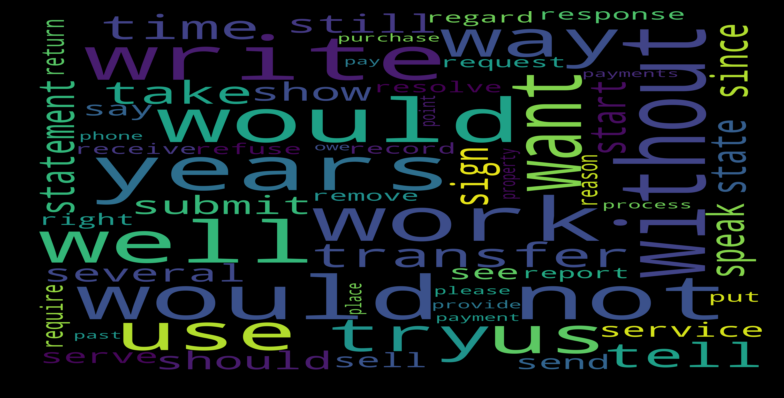

In [208]:
wc = WordCloud(max_font_size=500, background_color="black",width=3000,height=3000, max_words=60,relative_scaling=0.1,normalize_plurals=False).generate_from_frequencies(tfidf_Dis.vocabulary_)
plt.figure( figsize=(13,10), facecolor='k')
plt.imshow(wc,aspect=.5, interpolation='bilinear')
plt.axis("off")
plt.show()

## TRAIN Grev_Desc DATA -  Applying TF IDF vectorizer on undisputed train greviance values

In [209]:
tfidf_vectorizer_unDis = TfidfVectorizer(ngram_range=(1,3),min_df=0.1,max_df=0.5,max_features=1000) # stop_words='english'
tfidf_unDis= tfidf_vectorizer_unDis.fit(UnDisputed_Grev.Grev_Desc)  
tfidf_train_unDis = tfidf_unDis.transform(UnDisputed_Grev.Grev_Desc)

## TRAIN Grev_Desc DATA - Getting vocaboulary of undisputed train grievance text

In [210]:
print(tfidf_unDis.vocabulary_)

{'name': 81, 'customer': 31, 'loan': 72, 'finance': 47, 'home': 59, 'new': 84, 'statement': 124, 'close': 19, 'show': 118, 'pay': 94, 'receive': 104, 'check': 17, 'amount': 3, 'date': 33, 'however': 60, 'payment': 95, 'would': 141, 'like': 71, 'know': 66, 'happen': 56, 'balance': 9, 'account': 1, 'call': 13, 'speak': 121, 'give': 54, 'mortgage': 80, 'sell': 113, 'never': 83, 'late': 68, 'change': 15, 'several': 116, 'time': 130, 'state': 123, 'send': 114, 'back': 8, 'use': 135, 'ask': 6, 'should': 117, 'do': 36, 'money': 77, 'explain': 43, 'go': 55, 'letter': 70, 'put': 103, 'also': 2, 'make': 74, 'now': 88, 'say': 111, 'get': 53, 'could': 26, 'find': 49, 'well': 138, 'start': 122, 'last': 67, 'still': 125, 'take': 127, 'us': 134, 'issue': 64, 'try': 133, 'payments': 96, 'could not': 27, 'would not': 142, 'modification': 76, 'process': 100, 'months': 79, 'continue': 24, 'document': 37, 'help': 57, 'tell': 128, 'need': 82, 'end': 40, 'contact': 23, 'today': 131, 'work': 140, 'monthly': 

## TRAIN Grev_Desc DATA - Sorting the list by frequencey 

In [211]:
sorted(tfidf_unDis.vocabulary_.items(), key=lambda x: x[1])

[('able', 0),
 ('account', 1),
 ('also', 2),
 ('amount', 3),
 ('another', 4),
 ('apply', 5),
 ('ask', 6),
 ('attempt', 7),
 ('back', 8),
 ('balance', 9),
 ('bank', 10),
 ('believe', 11),
 ('bill', 12),
 ('call', 13),
 ('card', 14),
 ('change', 15),
 ('charge', 16),
 ('check', 17),
 ('claim', 18),
 ('close', 19),
 ('come', 20),
 ('company', 21),
 ('complaint', 22),
 ('contact', 23),
 ('continue', 24),
 ('contract', 25),
 ('could', 26),
 ('could not', 27),
 ('credit', 28),
 ('credit card', 29),
 ('credit report', 30),
 ('customer', 31),
 ('customer service', 32),
 ('date', 33),
 ('day', 34),
 ('days', 35),
 ('do', 36),
 ('document', 37),
 ('due', 38),
 ('email', 39),
 ('end', 40),
 ('even', 41),
 ('every', 42),
 ('explain', 43),
 ('fail', 44),
 ('fee', 45),
 ('file', 46),
 ('finance', 47),
 ('financial', 48),
 ('find', 49),
 ('first', 50),
 ('follow', 51),
 ('full', 52),
 ('get', 53),
 ('give', 54),
 ('go', 55),
 ('happen', 56),
 ('help', 57),
 ('hold', 58),
 ('home', 59),
 ('however', 6

## TRAIN Grev_Desc DATA - Creating word cloud for undisputed Grev desc text - Top 60 words

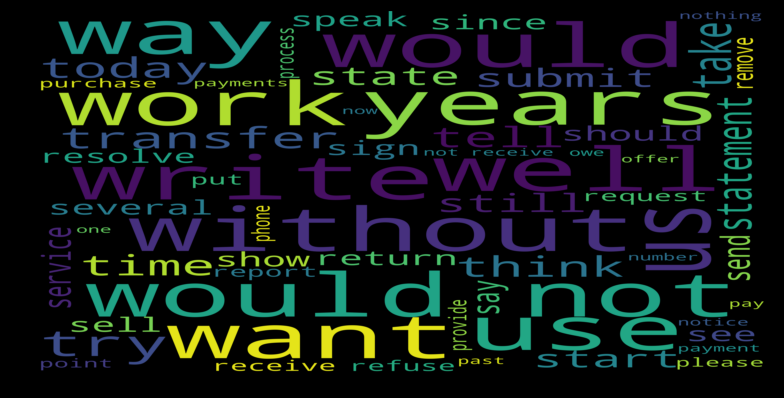

In [212]:
wc = WordCloud(max_font_size=500, background_color="black",width=3000,height=3000, max_words=60,relative_scaling=0.1,normalize_plurals=False).generate_from_frequencies(tfidf_unDis.vocabulary_)
plt.figure( figsize=(13,10), facecolor='k')
plt.imshow(wc,aspect=.5, interpolation='bilinear')
plt.axis("off")
plt.show()

## TEST Grev_Desc DATA - Importing lemmatized Griveance Descprtion

In [213]:
clean_test_text = pd.read_csv('lemm_clean_Test_Grev_All.csv')

In [214]:
clean_test_text.head()

,Unnamed: 0,0
0,0,currently mortgage flag star payment late reac...
1,1,auto finance possess subsequently sell husband...
2,2,fell behind payments back follow really unreas...
3,3,home parcel land first live home fail real est...
4,4,mortgage home assign loan transfer loan screw ...


In [215]:
clean_test_text_GrevDes = clean_test_text[['0']]

In [216]:
clean_test_text_GrevDes.head()

,0
0,currently mortgage flag star payment late reac...
1,auto finance possess subsequently sell husband...
2,fell behind payments back follow really unreas...
3,home parcel land first live home fail real est...
4,mortgage home assign loan transfer loan screw ...


In [217]:
clean_test_text_GrevDes.rename(columns={'0': 'Grev_Desc'},inplace=True)

In [218]:
clean_test_text_GrevDes.head()

,Grev_Desc
0,currently mortgage flag star payment late reac...
1,auto finance possess subsequently sell husband...
2,fell behind payments back follow really unreas...
3,home parcel land first live home fail real est...
4,mortgage home assign loan transfer loan screw ...


## TEST Grev_Desc DATA  - Getting "Disputed" column from main test data frame

In [219]:
test_for_target = pd.read_csv('GrievancesData_Test.csv')

In [220]:
test_for_target.shape


(27954, 10)

In [221]:
test_for_target.columns

Index(['GrievanceID', 'BankID', 'State', 'DateOfGrievance',
       'Grievance_Category', 'GrievanceDescription', 'LineOfBusiness',
       'ResolutionComments', 'Disputed', 'DateOfResolution'],
      dtype='object')

In [222]:
clean_test_text_GrevDes['Disputed'] = test_for_target.Disputed

In [223]:
clean_test_text_GrevDes.head()

,Grev_Desc,Disputed
0,currently mortgage flag star payment late reac...,No
1,auto finance possess subsequently sell husband...,No
2,fell behind payments back follow really unreas...,No
3,home parcel land first live home fail real est...,No
4,mortgage home assign loan transfer loan screw ...,No


## TEST Grev_Desc DATA  - Saperating Disputed and undisputed

In [224]:
Disputed_test_Grev = clean_test_text_GrevDes.loc[clean_test_text_GrevDes['Disputed'] == 'Yes']

In [225]:
Disputed_test_Grev.head()

,Grev_Desc,Disputed
7,ca not decrease monthly payments try deal pati...,Yes
8,charge fee speak overnight change mortgage num...,Yes
12,forward explanation aware husband already file...,Yes
26,ca not decrease monthly payments try deal pati...,Yes
34,hello veteran unemployed time injuries militar...,Yes


In [226]:
UnDisputed_test_Grev = clean_test_text_GrevDes.loc[clean_test_text_GrevDes['Disputed'] == 'No']

In [227]:
UnDisputed_test_Grev.head()

,Grev_Desc,Disputed
0,currently mortgage flag star payment late reac...,No
1,auto finance possess subsequently sell husband...,No
2,fell behind payments back follow really unreas...,No
3,home parcel land first live home fail real est...,No
4,mortgage home assign loan transfer loan screw ...,No


## TEST Grev_Desc DATA  -  TF IDF on Disputed text on test data

In [228]:
tfidf_vectorizer_test_des = TfidfVectorizer(ngram_range=(1,3),min_df=0.1,max_df=0.5,max_features=500) # stop_words='english'
tfidf_test_Dis= tfidf_vectorizer_test_des.fit(Disputed_test_Grev.Grev_Desc)  
tfidf_test_Disputed = tfidf_test_Dis.transform(Disputed_test_Grev.Grev_Desc)

## TEST Grev_Desc DATA  - Getting the vocabulary

In [229]:
print(tfidf_test_Dis.vocabulary_)

{'ca': 15, 'monthly': 86, 'payments': 104, 'try': 148, 'patient': 101, 'regard': 117, 'loan': 82, 'take': 143, 'name': 89, 'phone': 105, 'give': 63, 'money': 85, 'amount': 5, 'want': 151, 'document': 46, 'call': 17, 'start': 136, 'letter': 80, 'well': 153, 'financial': 57, 'put': 112, 'time': 145, 'say': 125, 'nothing': 93, 'file': 55, 'agree': 3, 'ask': 8, 'even': 50, 'send': 128, 'without': 154, 'home': 67, 'need': 90, 'make': 84, 'go': 64, 'know': 75, 'one': 98, 'payment': 103, 'number': 96, 'check': 22, 'account': 1, 'receive': 114, 'mail': 83, 'state': 137, 'find': 58, 'write': 158, 'date': 40, 'still': 139, 'also': 4, 'end': 49, 'contact': 28, 'refuse': 116, 'every': 51, 'close': 24, 'use': 150, 'pay': 102, 'months': 87, 'never': 91, 'do': 45, 'sign': 133, 'way': 152, 'please': 107, 'help': 65, 'ca not': 16, 'charge': 21, 'fee': 54, 'speak': 135, 'change': 20, 'mortgage': 88, 'service': 129, 'another': 6, 'keep': 74, 'bill': 14, 'record': 115, 'should': 131, 'complaint': 27, 'bel

## TEST Grev_Desc DATA  - Sorting the word with freqency

In [230]:
sorted(tfidf_test_Dis.vocabulary_.items(), key=lambda x: x[1])

[('able', 0),
 ('account', 1),
 ('additional', 2),
 ('agree', 3),
 ('also', 4),
 ('amount', 5),
 ('another', 6),
 ('apply', 7),
 ('ask', 8),
 ('attempt', 9),
 ('back', 10),
 ('balance', 11),
 ('bank', 12),
 ('believe', 13),
 ('bill', 14),
 ('ca', 15),
 ('ca not', 16),
 ('call', 17),
 ('card', 18),
 ('case', 19),
 ('change', 20),
 ('charge', 21),
 ('check', 22),
 ('claim', 23),
 ('close', 24),
 ('come', 25),
 ('company', 26),
 ('complaint', 27),
 ('contact', 28),
 ('continue', 29),
 ('contract', 30),
 ('correct', 31),
 ('could', 32),
 ('could not', 33),
 ('credit', 34),
 ('credit card', 35),
 ('credit report', 36),
 ('current', 37),
 ('customer', 38),
 ('customer service', 39),
 ('date', 40),
 ('day', 41),
 ('days', 42),
 ('debt', 43),
 ('dispute', 44),
 ('do', 45),
 ('document', 46),
 ('due', 47),
 ('email', 48),
 ('end', 49),
 ('even', 50),
 ('every', 51),
 ('explain', 52),
 ('fail', 53),
 ('fee', 54),
 ('file', 55),
 ('finance', 56),
 ('financial', 57),
 ('find', 58),
 ('first', 59),

## TEST Grev_Desc DATA  - Creating a word cloud Disputed grev, under test data - Top 60 words

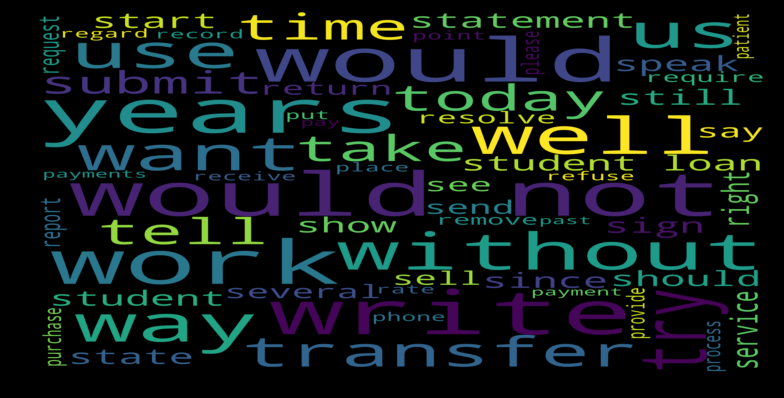

In [231]:
wc = WordCloud(max_font_size=500, background_color="black",width=3000,height=3000, max_words=60,relative_scaling=0.1,normalize_plurals=False).generate_from_frequencies(tfidf_test_Dis.vocabulary_)
plt.figure( figsize=(13,10), facecolor='k')
plt.imshow(wc,aspect=.5, interpolation='bilinear')
plt.axis("off")
plt.show()

## TEST Grev_Desc DATA - Applying tf idf vectorizer on undisputed Grev Desc 

In [232]:
tfidf_vectorizer_test_undes = TfidfVectorizer(ngram_range=(1,3),min_df=0.1,max_df=0.5,max_features=500) # stop_words='english'
tfidf_test_unDis= tfidf_vectorizer_test_undes.fit(UnDisputed_test_Grev.Grev_Desc)  
tfidf_test_unDisputed = tfidf_test_unDis.transform(UnDisputed_test_Grev.Grev_Desc)

## TEST Grev_Desc DATA -  Checking the vocabulary

In [233]:
voc_test = tfidf_test_unDis.vocabulary_

In [234]:
print(voc_test)

{'mortgage': 72, 'payment': 87, 'late': 62, 'loan': 66, 'now': 79, 'first': 46, 'time': 118, 'due': 37, 'issue': 58, 'payments': 88, 'receive': 96, 'notice': 78, 'go': 50, 'service': 104, 'interest': 57, 'company': 20, 'nothing': 77, 'account': 1, 'tell': 117, 'call': 13, 'back': 7, 'credit': 27, 'report': 98, 'show': 107, 'amount': 3, 'owe': 84, 'give': 49, 'take': 116, 'credit report': 29, 'years': 129, 'never': 75, 'months': 71, 'also': 2, 'income': 54, 'home': 52, 'date': 32, 'letter': 64, 'contract': 24, 'contact': 22, 'inform': 55, 'need': 74, 'phone': 89, 'us': 120, 'could': 25, 'make': 67, 'since': 108, 'get': 48, 'help': 51, 'even': 40, 'send': 103, 'another': 4, 'put': 94, 'say': 101, 'bill': 10, 'ask': 6, 'would': 127, 'days': 34, 'one': 82, 'know': 60, 'number': 80, 'name': 73, 'fee': 43, 'request': 100, 'information': 56, 'file': 44, 'do': 35, 'should': 106, 'refuse': 97, 'card': 14, 'provide': 92, 'rate': 95, 'purchase': 93, 'balance': 8, 'complaint': 21, 'several': 105, 

## TEST Grev_Desc DATA  - Sorting the vocabulary with frequency

In [235]:
sorted(voc_test.items(), key=lambda x: x[1])

[('able', 0),
 ('account', 1),
 ('also', 2),
 ('amount', 3),
 ('another', 4),
 ('apply', 5),
 ('ask', 6),
 ('back', 7),
 ('balance', 8),
 ('bank', 9),
 ('bill', 10),
 ('ca', 11),
 ('ca not', 12),
 ('call', 13),
 ('card', 14),
 ('change', 15),
 ('charge', 16),
 ('check', 17),
 ('close', 18),
 ('come', 19),
 ('company', 20),
 ('complaint', 21),
 ('contact', 22),
 ('continue', 23),
 ('contract', 24),
 ('could', 25),
 ('could not', 26),
 ('credit', 27),
 ('credit card', 28),
 ('credit report', 29),
 ('customer', 30),
 ('customer service', 31),
 ('date', 32),
 ('day', 33),
 ('days', 34),
 ('do', 35),
 ('document', 36),
 ('due', 37),
 ('email', 38),
 ('end', 39),
 ('even', 40),
 ('every', 41),
 ('explain', 42),
 ('fee', 43),
 ('file', 44),
 ('find', 45),
 ('first', 46),
 ('full', 47),
 ('get', 48),
 ('give', 49),
 ('go', 50),
 ('help', 51),
 ('home', 52),
 ('however', 53),
 ('income', 54),
 ('inform', 55),
 ('information', 56),
 ('interest', 57),
 ('issue', 58),
 ('keep', 59),
 ('know', 60),

## TEST Grev_Desc DATA  - Word cloud  - Top 60 words

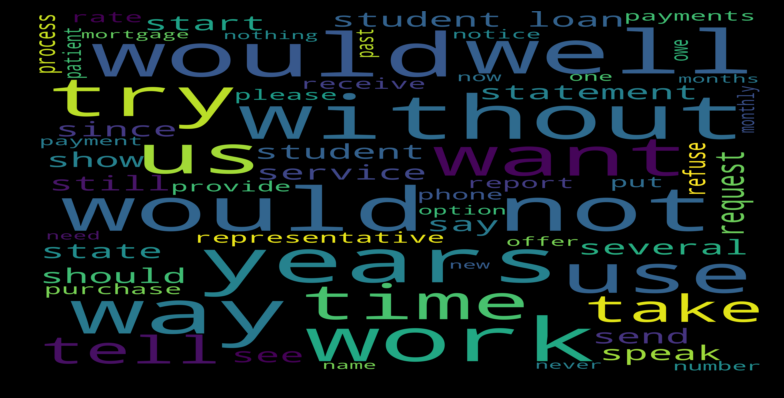

In [236]:
wc = WordCloud(max_font_size=500, background_color="black",width=3000,height=3000, max_words=60,relative_scaling=0.1,normalize_plurals=False).generate_from_frequencies(tfidf_test_unDis.vocabulary_)
plt.figure( figsize=(13,10), facecolor='k')
plt.imshow(wc,aspect=.5, interpolation='bilinear')
plt.axis("off")
plt.show()

## Text mining approach - 

I have extracted grievance description column and the Disputed column to form key word and phrases for Disputed and non-disputed grievances.

 - After pre-processing the text, under grievance description column,i have used tiidf vectorizer to find the key phrases.
 - Taking train data, and separating disputed and undisputed grievances, for Griveance description columns alone, which was pre-processed.
 - With tfidf transformation, extracted the list of words and phrases and ranked him according to the frequency of occurrences.
 - Formed a word cloud,highlighting the top 60 words under the category.

##  What more could I have done?
 
 - Utilize the corpse of word from the Federal Trade Commission Act.